In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from importlib import reload

import simulate
from simulate import simulate_data, bayes_boundary, parabola, circle, boundary_1
import plotting
from plotting import plot_two_variables, plot_roc_curve, plot_clf_decision_boundary, plot_strategy_curve, plot_classifier_profit

# Simulation

For the purpose of teaching, we will simulate a dataset where we know how the targets are assigned.<br>

The dataset will contain 3000 rows and two columns, so that we can visually understand what is going on. <br>

<b> Note: this is a very ideal simple scenario for visual understanding. This will not work in real life


In [2]:
N_population = 3000
data = simulate_data(population_size=N_population, N_cont_variables=2)

# Define the Bayesian Classifier boundary functions

Here we define the targets on our simulated dataset with a non linear separation. <br>
We will plot the points later for visualisation

In [3]:
probs,targets,coordinates = bayes_boundary(
    boundary_func=parabola,
    print_median=False, 
    x = data['col_0'], y = data['col_1'],
    max_accuracy=1)

# assign it to the dataset
data['y']=targets

#show the first five values
data.head(5)

,col_0,col_1,y
0,0.186373,0.919260,1
1,0.408911,0.018587,0
2,0.270595,0.548606,1
3,0.282735,0.596785,1
4,0.004333,0.836412,1


# Plot the Bayesian Classifier boundaries

Let's plot the points for visualising the data we are dealing with

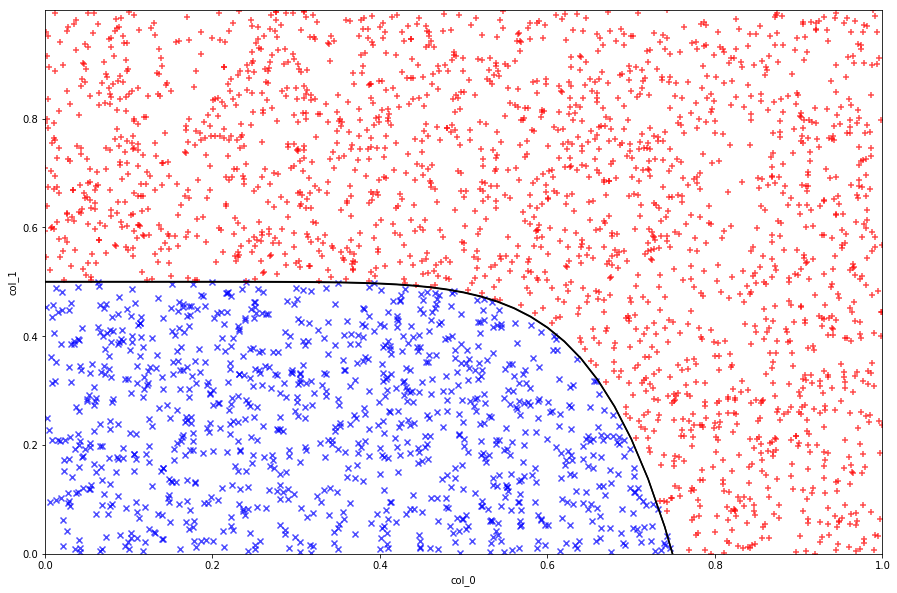

In [4]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_two_variables(df=data, fig=fig, ax=ax,plot_separation_boundary=True, boundary_func=parabola)

# Machine learning

Let's try to build some models to run the classifications.<br>

We will try the following models:
- **Logistic regression**: it is a linear model, which is the most common in building score cards. We will try to illustrate the limitations of this model
- **Random forest**: a tree-based ensemble model, which has more flexibility in splitting classes, but is prone to overfitting

## Train test split
We need to separate our sample in a training sample (where we build the model) and a test sample (where we can evaluate the model performance).<br>
The `train_test_split` function of scikit-learn is helpful

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# it is always a good idea to explicitly specify which columns represent the data to train on, and which columns are
# the targets
X = data[['col_0','col_1']]
y = data['y']

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.375, random_state=42)

In [8]:
X_train.shape, X_test.shape

((1875, 2), (1125, 2))

## Linear model - logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/Users/we56sc/.miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

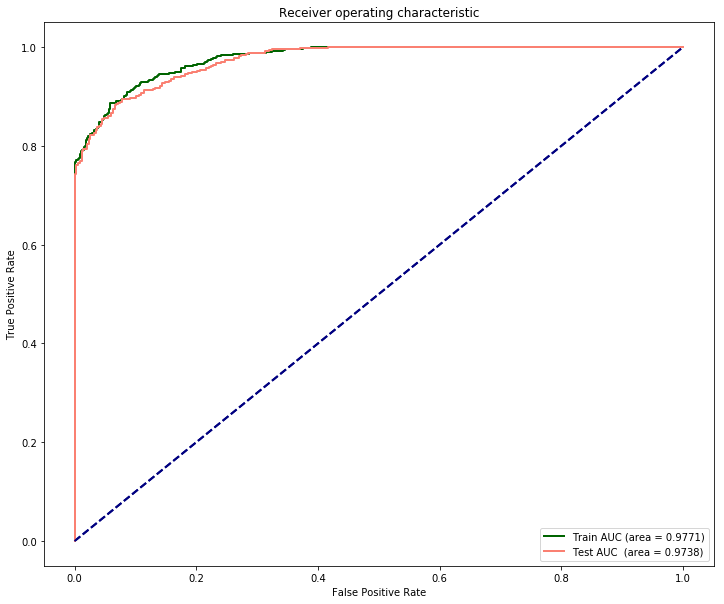

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
plot_roc_curve(lr,X_train,y_train, ax=ax, color='darkgreen',label = 'Train AUC')
plot_roc_curve(lr,X_test,y_test, ax=ax, color='salmon', label = 'Test AUC ')

#### The AUC seems quite good. But let's have a look at the decision boundary

In [12]:
reload(plotting)
from plotting import plot_clf_decision_boundary

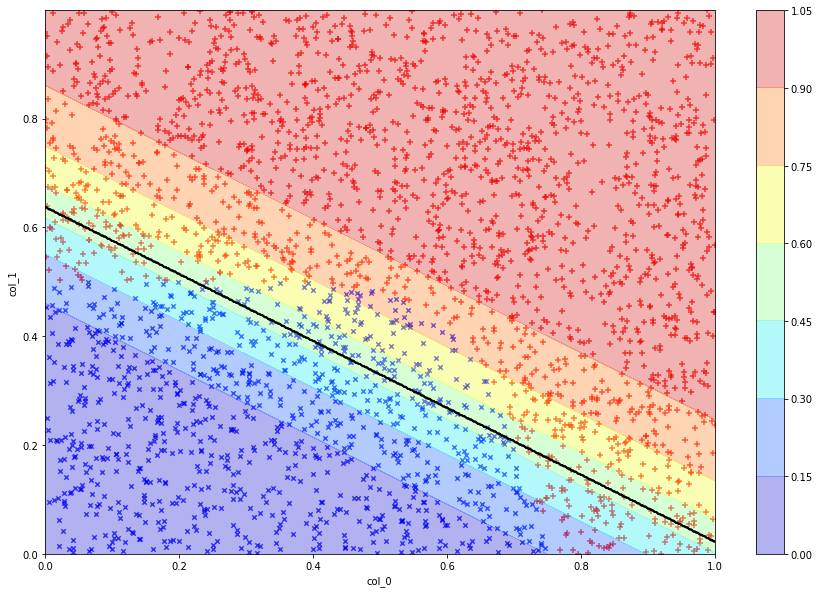

In [13]:
plot_clf_decision_boundary(df=data,clf =lr, plot_classifier_boundary = True, plot_classifier_prob_map=True)

## Train a non linear model - Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf = RandomForestClassifier()

In [16]:
rf.fit(X_train,y_train)

/Users/we56sc/.miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

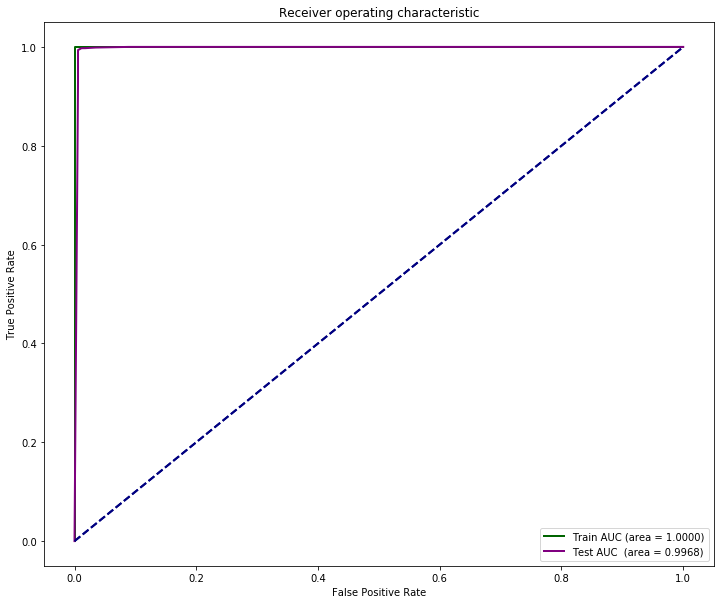

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
plot_roc_curve(rf,X_train,y_train, ax=ax, color='darkgreen',label = 'Train AUC')
plot_roc_curve(rf,X_test,y_test, ax=ax, color='purple', label = 'Test AUC ')

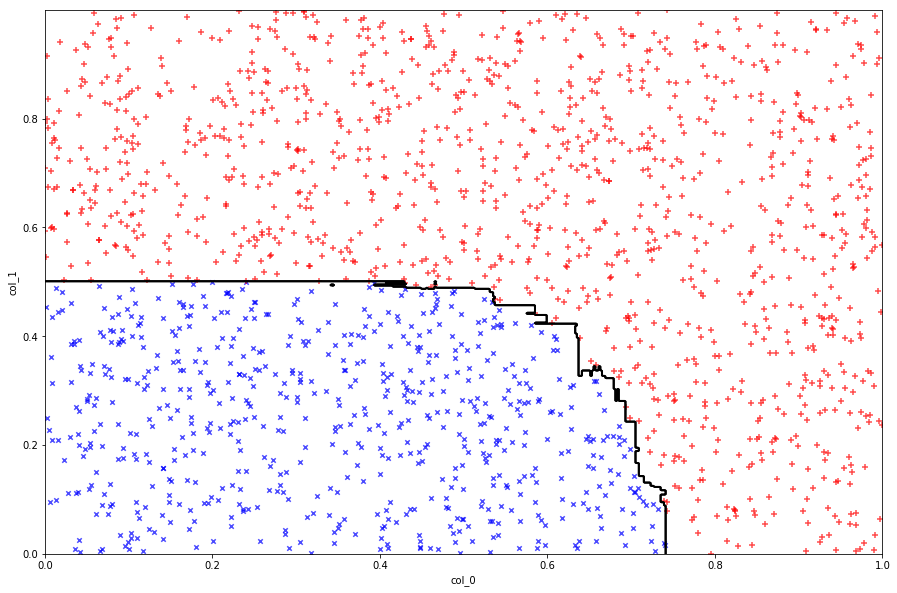

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_clf_decision_boundary(df=X_train, target = y_train,ax=ax, clf =rf, 
                           plot_classifier_boundary = True,plot_classifier_prob_map=False)

### The Random Forest separates the classes (almost) perfectly. But, this is too ideal to be true

# A more realistic scenario
In this simulated example, we have a clear (tough non-linear) separation between the two classes.<br>
Let's generate a more realistic scenario, where there is no perfect separation possible, i.e the irreducible error is not zero

In [20]:
probs,targets,coordinates = bayes_boundary(
    boundary_func=parabola,
    print_median=False, 
    x = data['col_0'], y = data['col_1'],
    max_accuracy=0.92) # in this case, 8% of my observations will randomly swap classes

# assign it to the dataset
data['y']=targets

#show the first five values
data.head(5)

,col_0,col_1,y
0,0.186373,0.919260,1
1,0.408911,0.018587,0
2,0.270595,0.548606,1
3,0.282735,0.596785,1
4,0.004333,0.836412,1


In [21]:
reload(plotting)
from plotting import plot_two_variables

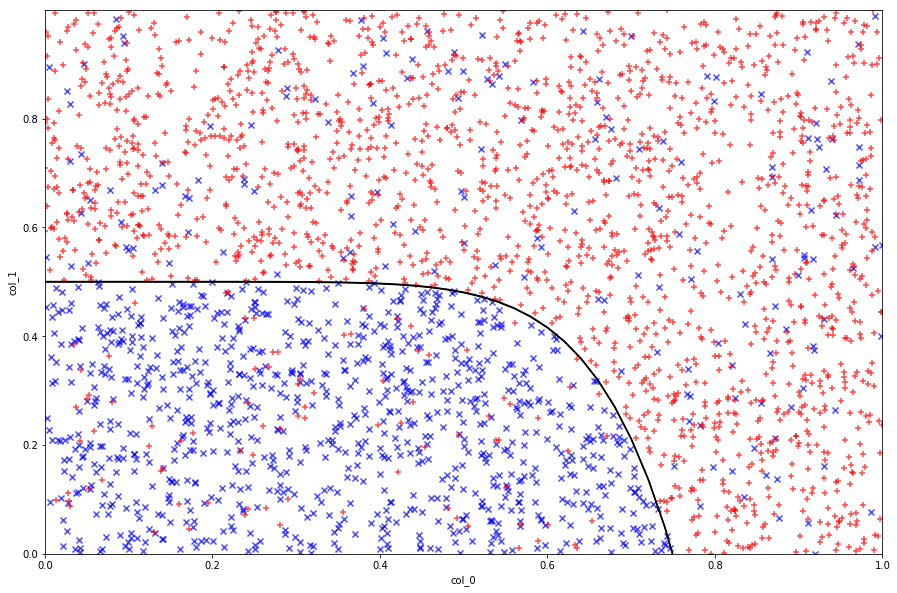

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_two_variables(df=data, fig=fig, ax=ax,plot_bayes_colourmap = False, plot_separation_boundary=True,boundary_func=parabola)

### As you can see, now some red points are deep in the blue area and viceversa

## Let's redo now the train test split, as we have a new sample

In [23]:
# it is always a good idea to explicitly specify which columns represent the data to train on, and which columns are
# the targets
X = data[['col_0','col_1']]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.375, random_state=42)

X_train.shape,X_test.shape

((1875, 2), (1125, 2))

### Train again the logistic regression

In [24]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/Users/we56sc/.miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

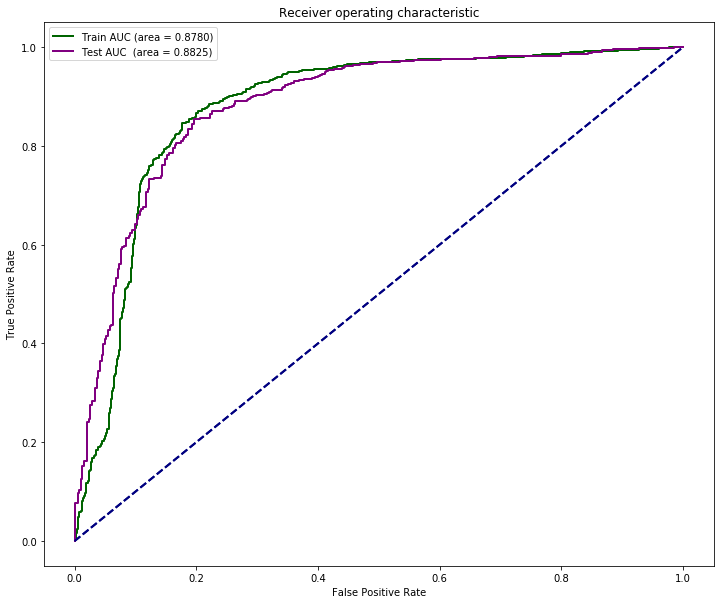

In [25]:
fig, ax = plt.subplots(figsize=(12, 10))
plot_roc_curve(lr,X_train,y_train, ax=ax, color='darkgreen',label = 'Train AUC')
plot_roc_curve(lr,X_test,y_test, ax=ax, color='purple', label = 'Test AUC ')

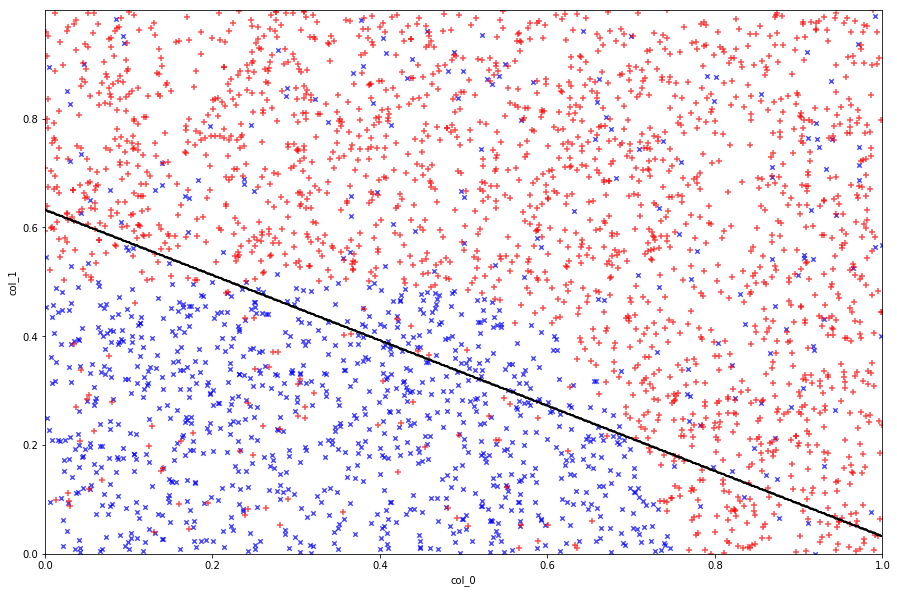

In [26]:
plot_clf_decision_boundary(df=data,clf =lr, plot_classifier_boundary = True,plot_classifier_decisions=False,
                           plot_classifier_prob_map=False)

### And now, the Random forest

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

/Users/we56sc/.miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

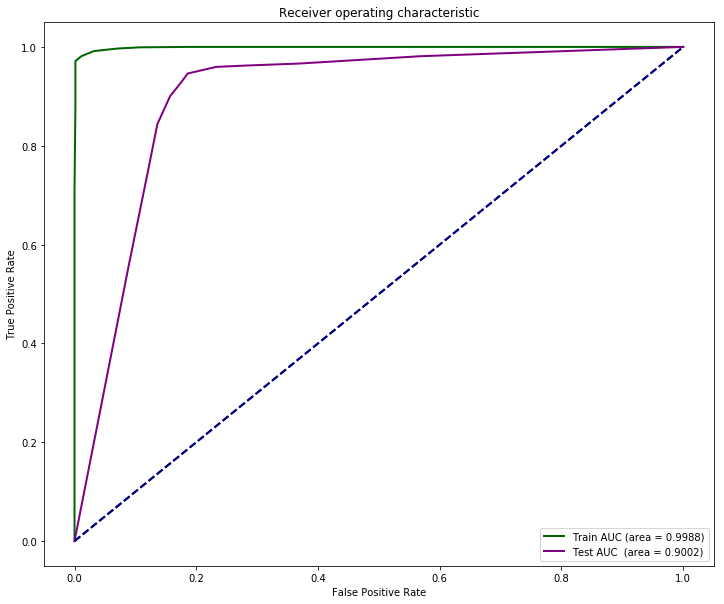

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))
plot_roc_curve(rf,X_train,y_train, ax=ax, color='darkgreen',label = 'Train AUC')
plot_roc_curve(rf,X_test,y_test, ax=ax, color='purple', label = 'Test AUC ')

# What happend? 
What can you tell from the AUC score on the training set and the AUC score on the test set?

## Let's see the decision boundary

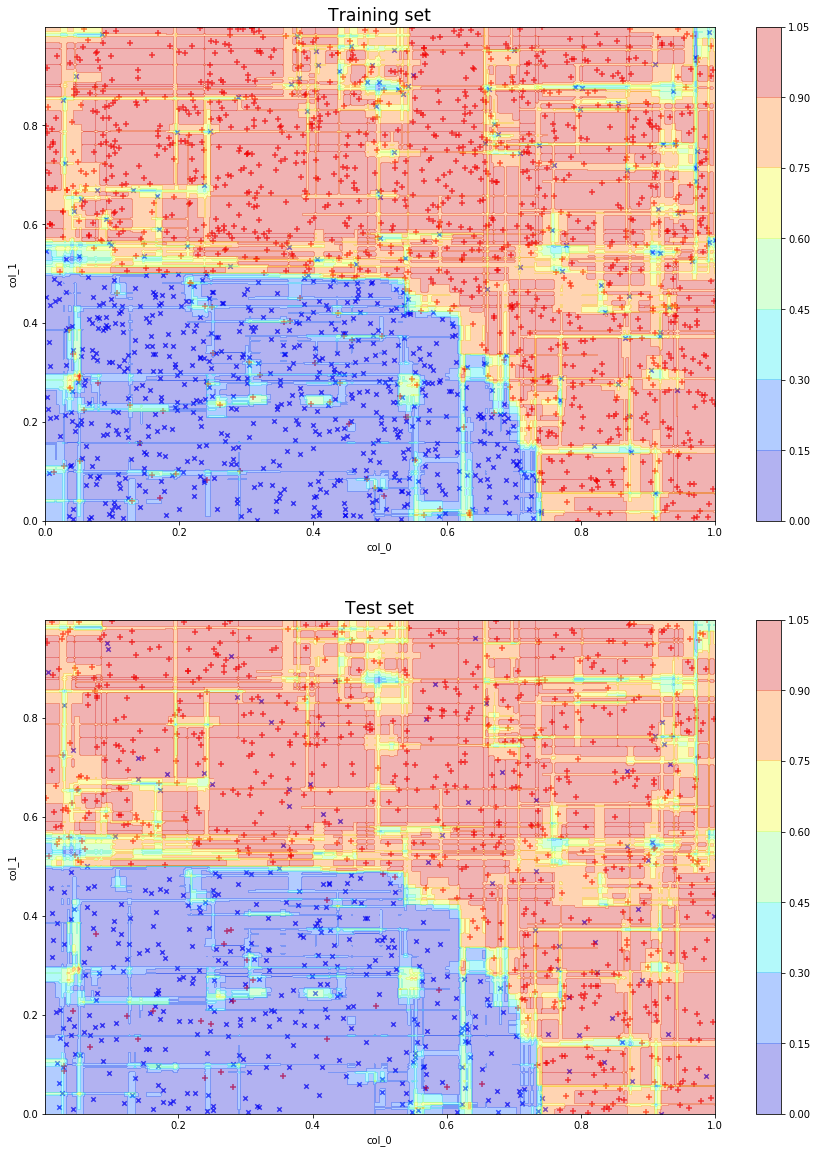

In [29]:
fig, ax = plt.subplots(2,1,figsize=(15, 20))
ax[0].set_title('Training set', size='xx-large')
plot_clf_decision_boundary(df=X_train, target = y_train,fig = fig,ax = ax[0], clf =rf, 
                           plot_classifier_boundary = False,plot_classifier_prob_map=True)
ax[1].set_title('Test set', size='xx-large')
plot_clf_decision_boundary(df=X_test, target = y_test,fig = fig, ax = ax[1], clf =rf, 
                           plot_classifier_boundary = False,plot_classifier_prob_map=True)

# EXERCISE

- check the hyperparameters of the RandomForest (try `help(RandomForestClassifier)`)
- try modifing the hypterparameteres until you reach a better generalization and you reduce the overfitting

**tip** consider the `n_estimators` and the `max_depth`


**Note** the training time increases with n_estimators:
* with 10 trees takes cca 3-4 seconds
* with 100 trees takes cca 20-30 seconds
* with 1000 trees takes cca 8-10 minutes

In [32]:
%%time
rf_exercise = RandomForestClassifier(
n_estimators=<enter_value>
max_depth=<enter_value>
)
rf_exercise.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(12, 10))
plot_roc_curve(rf_exercise,X_train,y_train, ax=ax, color='darkgreen',label = 'Train AUC')
plot_roc_curve(rf_exercise,X_test,y_test, ax=ax, color='purple', label = 'Test AUC ')

fig, ax = plt.subplots(2,1,figsize=(15, 20))
ax[0].set_title('Training set', size='xx-large')
plot_clf_decision_boundary(df=X_train, target = y_train,fig = fig,ax = ax[0], clf =rf_exercise, 
                           plot_classifier_boundary = True,plot_classifier_prob_map=True)
ax[1].set_title('Test set', size='xx-large')
plot_clf_decision_boundary(df=X_test, target = y_test,fig = fig, ax = ax[1], clf =rf_exercise, 
                           plot_classifier_boundary = True,plot_classifier_prob_map=True)

SyntaxError: invalid syntax (<unknown>, line 2)

### Let's get an idea of how hyperparemeters affect the model performance

In [33]:
from plotting import plot_score_vs_hyperparameter

CPU times: user 9.49 s, sys: 25.4 ms, total: 9.51 s
Wall time: 9.53 s


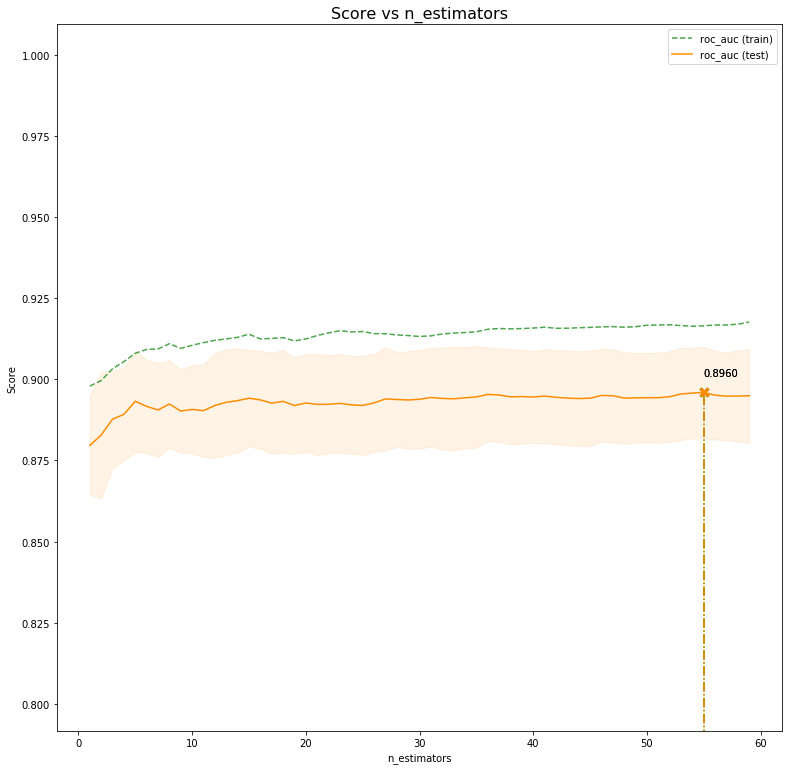

In [34]:
%%time
rf_test = RandomForestClassifier(random_state=42,n_estimators=10, max_depth=3)
param_grid={'n_estimators': range(1, 60, 1)}

plot_score_vs_hyperparameter(rf_test,X_train,y_train, scoring_metric = 'roc_auc',param_grid=param_grid)



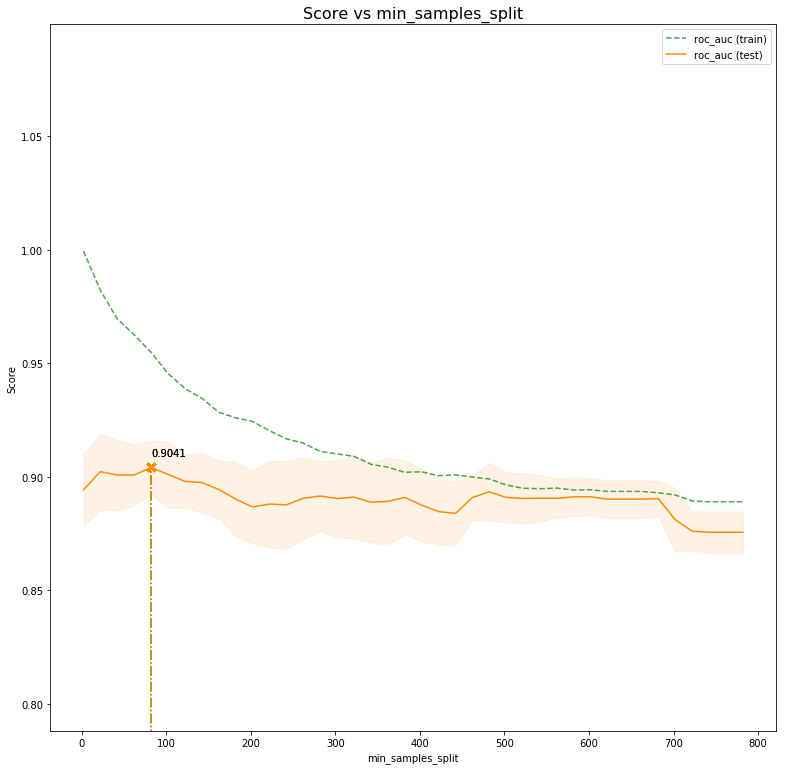

In [35]:
rf_test = RandomForestClassifier(random_state=42,n_estimators=10)
param_grid={'min_samples_split': range(2, 800, 20)}

plot_score_vs_hyperparameter(rf_test,X_train,y_train, scoring_metric = 'roc_auc',param_grid=param_grid)



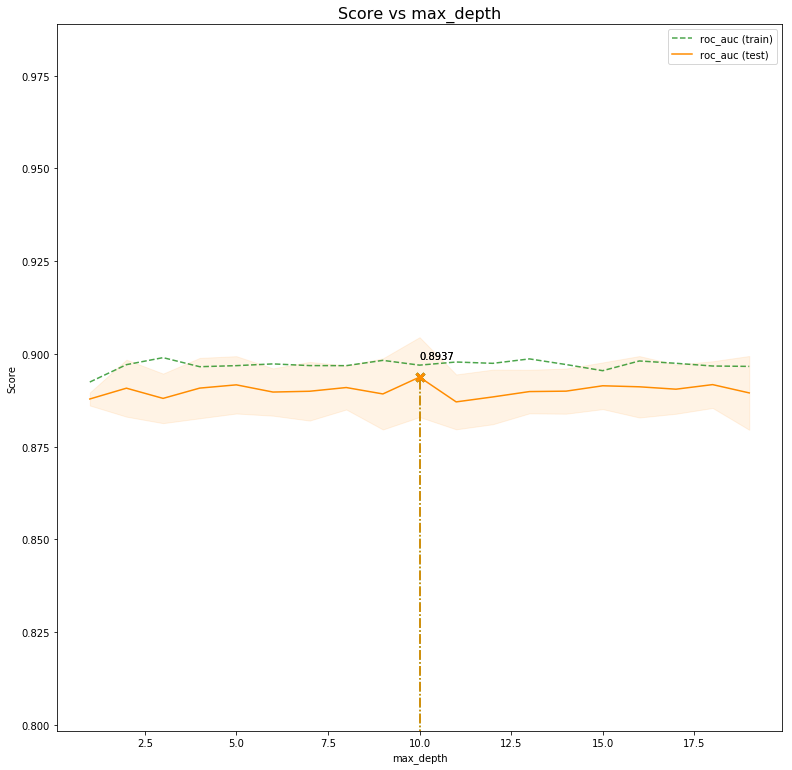

In [36]:
param_grid={'max_depth': list(range(1, 20, 1))}
#param_grid={'min_samples_split': range(2, 800, 20)}
plot_score_vs_hyperparameter(RandomForestClassifier(n_estimators=40,max_depth=8,min_samples_split=500),
                             X_train,y_train, 
                             scoring_metric = 'roc_auc',
                             param_grid=param_grid)



In [37]:
final_rf = RandomForestClassifier(n_estimators=40,max_depth=8,min_samples_split=500)

In [38]:
final_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

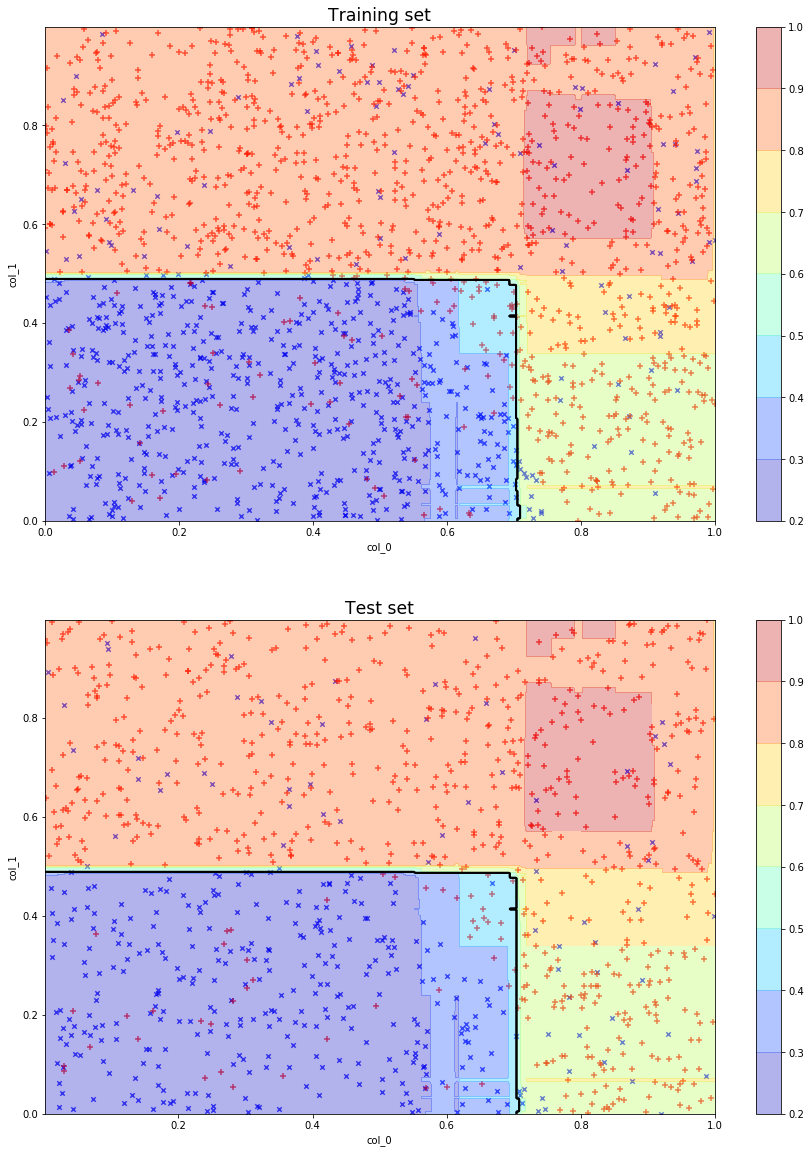

In [39]:
fig, ax = plt.subplots(2,1,figsize=(15, 20))
ax[0].set_title('Training set', size='xx-large')
plot_clf_decision_boundary(df=X_train, target = y_train,fig = fig,ax = ax[0], clf =final_rf, 
                           plot_classifier_boundary = True,plot_classifier_prob_map=True)
ax[1].set_title('Test set', size='xx-large')
plot_clf_decision_boundary(df=X_test, target = y_test,fig = fig, ax = ax[1], clf =final_rf, 
                           plot_classifier_boundary = True,plot_classifier_prob_map=True)